In [1]:
#%pip install pandas
import pandas as pd
#%pip install emot==2.1
import re
import string
import json
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [2]:
# Function for converting emoticons into word
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

# Function for converting emoji into word
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text

In [3]:
df = pd.read_csv("data_huang_devansh.csv", encoding='utf8')
df["Content"] = df["Content"].astype(str)

In [4]:
HTTP_PATTERN = re.compile(".*http.*")
def remove_links(txt):
    # Split the string into words
    words = txt.split()
    
    # Use regular expression to find words containing "http"
    http_words = [word for word in words if HTTP_PATTERN.match(word)]
    count = len(http_words)
    
    for word in http_words:
        words.remove(word)
    
    txt = ' '.join(words).replace("</a>","").replace("<a","").replace("</a", "")
    
    # Join the remaining words back into a string
    return txt,count

df["Content"],df["Links"] = zip(*df["Content"].apply(remove_links))

In [5]:
df["Length"]=df["Content"].apply(lambda txt: len(txt))

,Content,Label,Links,Length
842285,"""LA VERDADA SI MUERE EL PRINCIPE NI ME VA NI M...",0,0,123
842286,"""In the recent Occupy Wall Street protests by ...",0,0,432
842287,"""you are a frightened infant who never saw com...",1,0,77
842288,"""I'm so tired of some people cramming their re...",1,0,214
842289,"""IKR~~!!!! i know about them and other close f...",0,0,427
842290,"""You are an idiot. Romney is not going to give...",1,0,83
842291,"""No, people have a right to speak, no matter h...",1,0,66
842292,"""I hope you are having a girl :) are u gonna f...",0,0,62
842293,"""too funny. And I know a couple of dogs who wo...",0,0,61
842294,"""Hell yeagh man kluv these hot pig fukkas-luv ...",0,0,109


In [6]:
df["Upper_case"]=df["Content"].apply(lambda txt: sum(1 for c in txt if c.isupper()))

,Content,Label,Links,Length,Upper_case
842285,"""LA VERDADA SI MUERE EL PRINCIPE NI ME VA NI M...",0,0,123,93
842286,"""In the recent Occupy Wall Street protests by ...",0,0,432,9
842287,"""you are a frightened infant who never saw com...",1,0,77,1
842288,"""I'm so tired of some people cramming their re...",1,0,214,4
842289,"""IKR~~!!!! i know about them and other close f...",0,0,427,131
842290,"""You are an idiot. Romney is not going to give...",1,0,83,2
842291,"""No, people have a right to speak, no matter h...",1,0,66,1
842292,"""I hope you are having a girl :) are u gonna f...",0,0,62,1
842293,"""too funny. And I know a couple of dogs who wo...",0,0,61,2
842294,"""Hell yeagh man kluv these hot pig fukkas-luv ...",0,0,109,2


In [7]:
#Convert emojis to text
df["Content"] = df["Content"].apply(convert_emojis)

,Content,Label,Links,Length,Upper_case
0,`- This is not ``creative``. Those are the dic...,0,0,2371,47
1,` :: the term ``standard model`` is itself les...,0,0,707,15
2,"True or false, the situation as of March 2002 ...",0,0,326,20
3,"Next, maybe you could work on being less conde...",0,0,421,10
4,This page will need disambiguation.,0,0,35,1


In [8]:
#Convert emoticons to text
df["Content"] = df["Content"].apply(convert_emoticons)

In [9]:
df["Hashtag"] = df["Content"].apply(lambda txt: sum(1 for word in txt.split() if word.startswith("#")))

In [10]:
#Remove special chars from the string (except quotation marks)
def remove_trailing_chars(txt):
    new_str = []
    for x in txt.split():
        new_str.append(str(x).lstrip('_\-;%()|+&=*%.,!?:$[]/^`~<>\'"').rstrip('"_\-;%()|+&=*%.,!?:#$@[]/^~`<>\'"')
                       .replace("\\n"," ").replace("\\\\xa0"," ").replace("\\r"," ").replace("\\'","'")
                       .replace("\\\\xc2"," ").replace("\\xa0"," ").replace("\\xc2"," ").replace("\\",""))
        
    return ' '.join(new_str)

In [11]:
with open("Contractions.json",'r')as f:
        contractions = json.load(f)

df["Content"] = df["Content"].apply(remove_trailing_chars)

In [12]:
def replace_contractions(txt):
    txt = txt.split()
    new_string = [contractions.get(word.lower(),word) for word in txt]
    return ' '.join(new_string)

In [13]:
df["Content"] = df["Content"].apply(replace_contractions)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Read the CSV file into a dataframe and extract the words into a set
profanities_df = pd.read_csv('Profanities.csv', header=None, names=['word'])
profanities = set(profanities_df['word'])

def count_profanities(txt):
    global profanities
    vectorizer = CountVectorizer(vocabulary=profanities, ngram_range=(1, len(max(profanities, key=len))))
    counts = vectorizer.transform([txt])
    return counts.sum()

df["Profanities"] = df["Content"].apply(count_profanities)

In [26]:
df["User_mentions"] = df["Content"].apply(lambda txt: sum(1 for word in txt.split() if word.startswith('@')))

In [27]:
df["Emoji"]=df["Content"].apply(lambda txt: sum(1 for word in txt.split() if "_" in word
                                                and word[0].isupper() and word[0].isalpha()))

In [28]:
df["Digits"] = df["Content"].apply(lambda txt: sum(1 for c in txt if c.isdigit()))

In [29]:
def clear_text(input_string):
    # Create a translation table with all special characters and digits mapped to None
    translation_table = str.maketrans('', '', string.punctuation + string.digits)
    
    # Split the input string into words and remove special characters and digits from each word
    words = [word.translate(translation_table) for word in input_string.split()]
    
    # Join the cleaned words back into a string
    cleaned_string = ' '.join(words).lower()
    return cleaned_string

In [30]:
#%pip install nltk
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Get stopwords for English
stop = stopwords.words('english')

df['Content'] = df['Content'].apply(clear_text)
df['Content'] = df['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
import nltk
nltk.download('wordnet')  # Download WordNet corpus for lemmatisation
nltk.download("punkt")
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatiser
lemmatizer = WordNetLemmatizer()

# Assuming 'df' is your DataFrame with a column named 'Content'
df['Content'] = df['Content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...


In [73]:
df.describe()

,Label,Links,Length,Upper_case,Hashtag,Profanities,User_mentions,Emoji,Digits
count,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000
mean,0.157075,0.031050,231.160848,7.887356,0.160405,0.342730,0.153102,0.046651,1.187768
std,0.363872,0.173453,286.850953,10.780025,0.591699,0.723406,0.482595,0.210890,3.046622
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,125.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,274.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2254.000000,100.000000,4.000000,4.000000,3.000000,1.000000,23.000000


In [3]:
from scipy import stats
import numpy as np

def remove_outliers_Zscore (attribute):

    global df
    # Calculate modified z-scores
    df['Modified Z-Score'] = np.abs(stats.zscore(df[attribute], ddof=0.6745))

    # Set threshold for outliers
    threshold = 3.5

    # Identify outliers
    outliers = df[df['Modified Z-Score'] > threshold]
    print("Outliers for attribute "+ attribute +" -> " + str(len(outliers)))

    # Remove outliers
    df = df[df['Modified Z-Score'] <= threshold]

    # Drop temporary column
    df = df.drop('Modified Z-Score', axis=1)


df = df[df["Length"] >= 2]
remove_outliers_Zscore("Length")
remove_outliers_Zscore("Links")
remove_outliers_Zscore("Upper_case")
remove_outliers_Zscore("Profanities")
remove_outliers_Zscore("Hashtag")
remove_outliers_Zscore("User_mentions")
remove_outliers_Zscore("Emoji")
remove_outliers_Zscore("Digits")
df.describe()

Outliers for attribute Length -> 12196
Outliers for attribute Links -> 4277
Outliers for attribute Upper_case -> 5092
Outliers for attribute Profanities -> 7057
Outliers for attribute Hashtag -> 14344
Outliers for attribute User_mentions -> 5983
Outliers for attribute Emoji -> 5047
Outliers for attribute Digits -> 5343


,Label,Links,Length,Upper_case,Hashtag,Profanities,User_mentions,Emoji,Digits
count,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000,782669.000000
mean,0.157075,0.031050,231.160848,7.887356,0.160405,0.342730,0.153102,0.046651,1.187768
std,0.363872,0.173453,286.850953,10.780025,0.591699,0.723406,0.482595,0.210890,3.046622
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,125.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,274.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2254.000000,100.000000,4.000000,4.000000,3.000000,1.000000,23.000000


In [74]:
df.to_csv("preprocessed_data.csv", index=False)

In [ ]:
df = pd.read_csv("preprocessed_data.csv", encoding='utf8')
df["Content"] = df["Content"].astype(str)
df.describe()

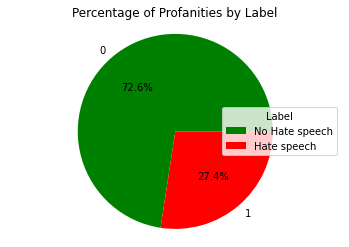

In [4]:
import matplotlib.pyplot as plt

# Group the dataframe by 'Label' and calculate the sum of 'Profanities' for each label
profanity_totals = df.groupby('Label')['Profanities'].sum()

# Set custom colors for the pie chart
colors = ['green', 'red']

# Create a pie chart
plt.pie(profanity_totals, labels=profanity_totals.index, autopct='%1.1f%%', colors=colors)

# Add a legend on the right side
plt.legend(title='Label', labels=['No Hate speech', 'Hate speech'], loc='center right')

plt.title("Percentage of Profanities by Label")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


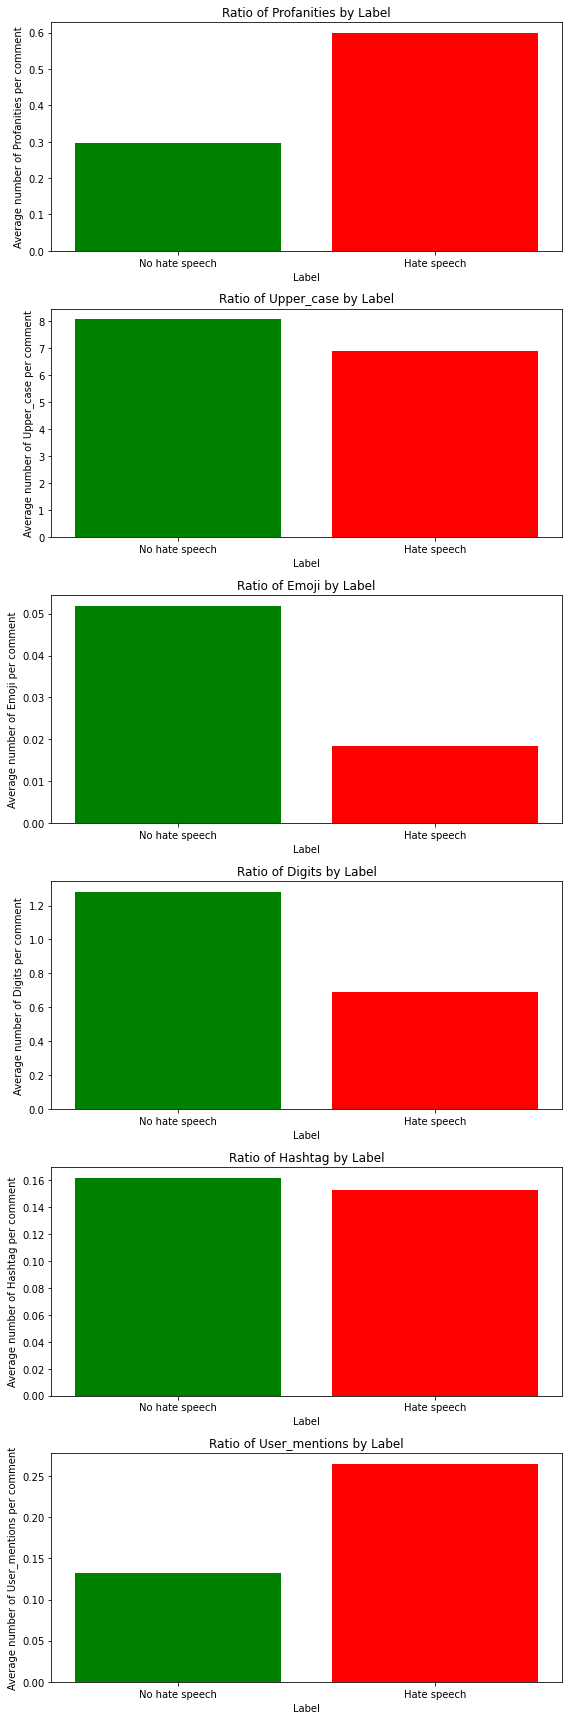

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def ratio(attribute):
    # Calculate ratios
    total_counts = df['Label'].value_counts()  # Count the occurrences of each label (0 and 1)
    profanities_0 = df.loc[df['Label'] == 0, attribute]  # Profanities for label 0
    profanities_1 = df.loc[df['Label'] == 1, attribute]  # Profanities for label 1
    ratio_0 = np.sum(profanities_0) / total_counts[0]  # Ratio of profanities for label 0
    ratio_1 = np.sum(profanities_1) / total_counts[1]  # Ratio of profanities for label 1

    return [ratio_0, ratio_1]

# Plotting the stacked bar charts
categories = ['No hate speech', 'Hate speech']
colors = ['green', 'red']

attributes = ["Profanities", "Upper_case", "Emoji", "Digits", "Hashtag", "User_mentions"]
ratios = [ratio(attr) for attr in attributes]

fig, axs = plt.subplots(len(attributes), 1, figsize=(8, len(attributes) * 4))

for i in range(len(attributes)):
    axs[i].bar(categories, ratios[i], color=colors)
    axs[i].set_xlabel('Label')
    axs[i].set_ylabel('Average number of ' + attributes[i] + ' per comment')
    axs[i].set_title('Ratio of ' + attributes[i] + ' by Label')

plt.tight_layout()
plt.show()


In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def histogram_profanities(dataframe, profanities, color):
    # Create a CountVectorizer with a custom vocabulary of profanities
    vectorizer = CountVectorizer(vocabulary=profanities, ngram_range=(1, len(max(profanities, key=len))))

    # Transform the dataframe column into a bag-of-words matrix
    bow_matrix = vectorizer.fit_transform(dataframe)

    # Get the vocabulary (profanities)
    vocabulary = vectorizer.get_feature_names_out()

    # Calculate the frequency of each profanity
    profanity_frequencies = bow_matrix.sum(axis=0).A1

    # Sort profanities and frequencies in descending order
    sorted_indices = np.argsort(profanity_frequencies)[::-1]
    sorted_profanities = [vocabulary[i] for i in sorted_indices]
    sorted_frequencies = profanity_frequencies[sorted_indices]

    # Plot the histogram
    plt.bar(sorted_profanities[:10], sorted_frequencies[:10], color=color)
    plt.xlabel('Profanities')
    plt.ylabel('Frequency')
    plt.title('Top 10 Most Frequent Profanities')
    plt.xticks(rotation=45)
    plt.show()


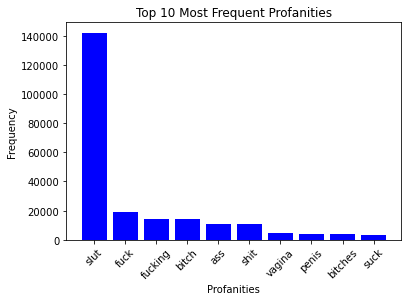

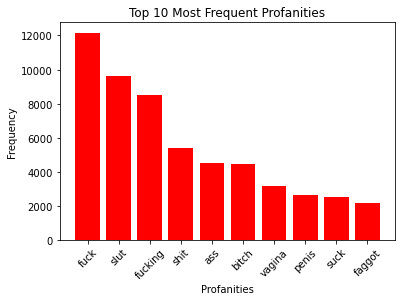

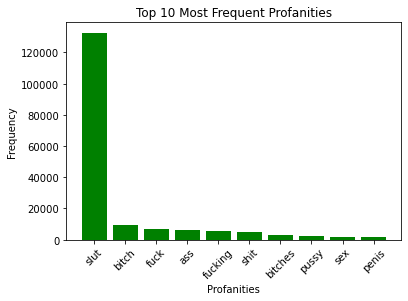

In [41]:
#profanities_df = pd.read_csv('Profanities.csv', header=None, names=['word'])
#profanities = set(profanities_df['word'])

histogram_profanities(df["Content"],list(profanities),"orange")
#Hate speech subset graph
histogram_profanities(df[df["Label"]==1]["Content"],list(profanities),"red")
#NON hate speech subset graph
histogram_profanities(df[df["Label"]==0]["Content"],list(profanities),"green")

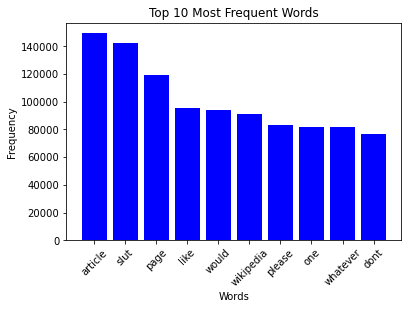

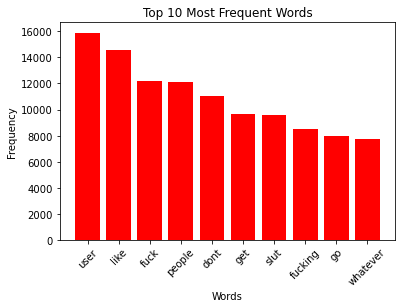

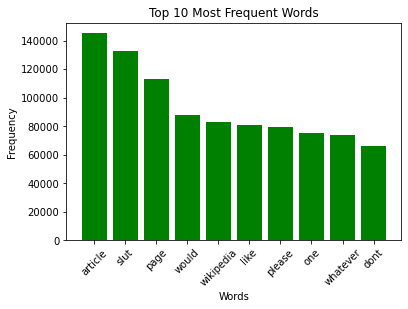

In [56]:
from collections import Counter

def histogram_words(dataframe, color):
    
    words = dataframe.str.split()  # Split text by spaces to get individual words

    # Flatten the list of words
    word_list = [word for sublist in words for word in sublist]

    # Count the frequency of each word using Counter
    word_counts = Counter(word_list)

    # Get the top 10 most frequent words and their counts
    top_words = word_counts.most_common(10)
    words, counts = zip(*top_words)

    # Plot the histogram
    plt.bar(words, counts, color=color)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Most Frequent Words')
    plt.xticks(rotation=45)
    plt.show()

histogram_words(df["Content"],"blue")
histogram_words(df[df["Label"]==1]["Content"],"red")
histogram_words(df[df["Label"]==0]["Content"],"green")


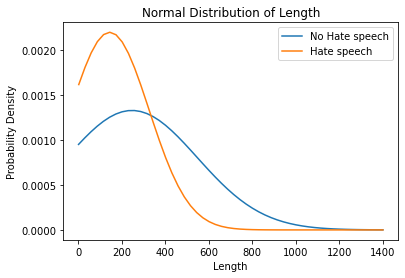

In [22]:
from scipy.stats import norm

# Filter the DataFrame by Label values
label_0_lengths = df[df["Label"] == 0]["Length"]
label_1_lengths = df[df["Label"] == 1]["Length"]

# Fit a normal distribution to the length values
mean_0, std_0 = norm.fit(label_0_lengths)
mean_1 , std_1 = norm.fit(label_1_lengths)
# Generate x-values for the plot
x_0 = np.linspace(label_0_lengths.min(), 1400)
x_1 = np.linspace(label_1_lengths.min(), 1400)
# Calculate the corresponding y-values using the fitted distribution
y_0 = norm.pdf(x_0, mean_0, std_0)
y_1 = norm.pdf(x_1, mean_1, std_1)
# Plot the normal distribution
plt.plot(x_0, y_0, label="No Hate speech")
plt.plot(x_1, y_1, label="Hate speech")
plt.xlabel("Length")
plt.ylabel("Probability Density")
plt.title("Normal Distribution of Length")
plt.legend()
plt.show()


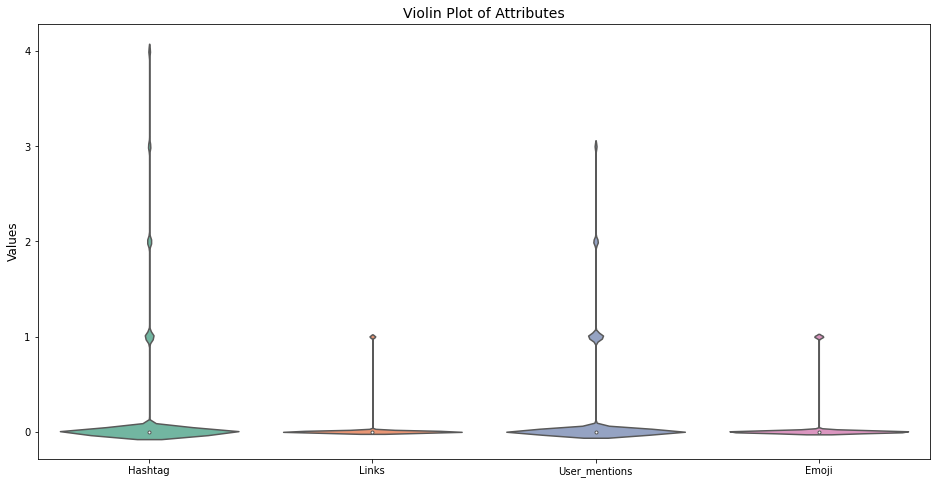

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the violin plot
sns.violinplot(data=df[["Hashtag", "Links", "User_mentions","Emoji"]], palette="Set2",scale="width")

# Set the y-axis label
plt.ylabel("Values", fontsize=12)

# Set the plot title
plt.title("Violin Plot of Attributes", fontsize=14)

# Show the plot
plt.show()


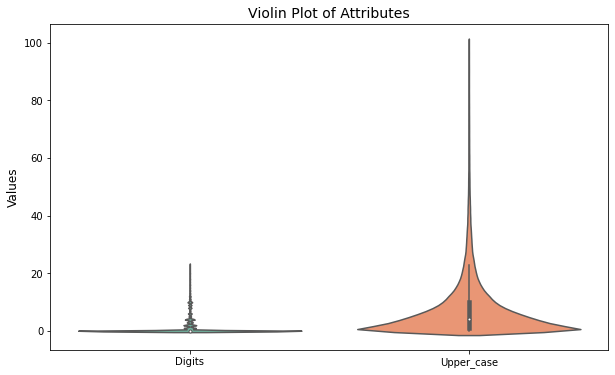

In [48]:
plt.figure(figsize=(10, 6))

# Create the violin plot
sns.violinplot(data=df[["Digits","Upper_case"]], palette="Set2",scale="width")

# Set the y-axis label
plt.ylabel("Values", fontsize=12)

# Set the plot title
plt.title("Violin Plot of Attributes", fontsize=14)

# Show the plot
plt.show()

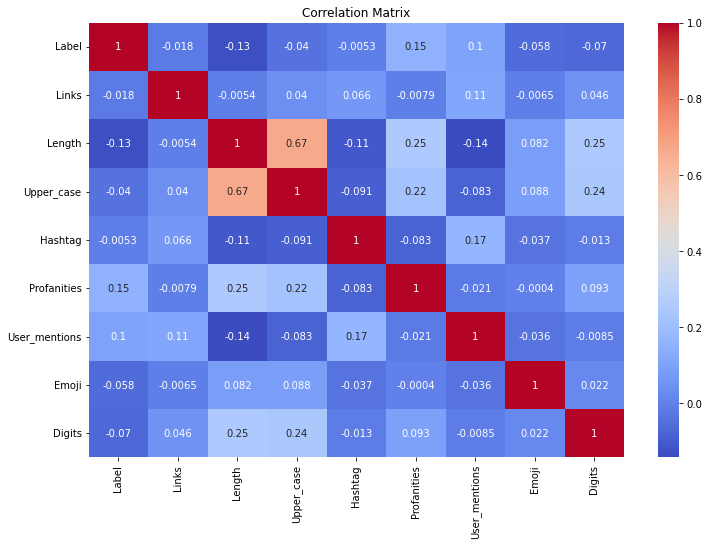

In [75]:
correlation_matrix = df.drop("Content",axis=1).corr()

plt.figure(figsize=(12, 8))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [103]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
X = df.drop("Label", axis=1)
Y = df['Label']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [100]:
def label_distribution(data):

    label_counts = data.value_counts()

    # Define the colors for each label
    colors = ['green', 'red']

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

    # Add a title
    plt.title('Label Distribution in Training Set')

    # Display the chart
    plt.show()

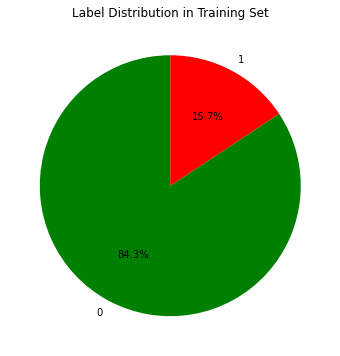

In [104]:
label_distribution(y_train)

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTEENN
from scipy import sparse

# Preprocess text data
# Example: Tokenization and TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['Content'])

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test['Content'])

# Drop the 'Content' column from X_train and X_test
X_train = X_train.drop('Content', axis=1)
X_test = X_test.drop('Content', axis=1)

# Convert the TF-IDF matrix to sparse matrices
X_train_tfidf = sparse.csr_matrix(X_train_tfidf)
X_test_tfidf = sparse.csr_matrix(X_test_tfidf)
X_train = sparse.csr_matrix(X_train)
X_test = sparse.csr_matrix(X_test)

# Concatenate the TF-IDF sparse matrices with the respective training and test sets
X_train = sparse.hstack([X_train, X_train_tfidf])
X_test = sparse.hstack([X_test, X_test_tfidf])

# Apply SMOTEENN for balancing the dataset
smoteenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train, y_train)


TypeError: 'coo_matrix' object is not subscriptable

In [ ]:
label_distribution(y_train_balanced)

In [67]:
#RFE -> only on the training set and after TF-IDF
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Separate the features (independent variables) from the target variable
X = df.drop(["Label","Content"], axis=1)  # Features
y = df["Label"]  # Target variable

# Create a Random Forest Classifier (or replace it with the model of your choice)
model = RandomForestClassifier()

# Create an RFE object and specify the number of desired features to keep
rfe = RFE(estimator=model, n_features_to_select=4)  # Keep top 5 features

# Perform RFE feature selection
X_selected = rfe.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)


KeyboardInterrupt: 